In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import ugradio

## The Double-sideband Mixer (DSB Mixer)

local oscillator (LO) frequency = 

0 dBm = 0.2236V

In [23]:
vsamp = 62.5e6

In [5]:
vlo = 0.25*62.5e6
dv = 0.05*vlo
vsig1 = vlo + dv
vsig2 = vlo -dv

In [9]:
vlo

15625000.0

In [8]:
dv

781250.0

In [6]:
vsig1

16406250.0

In [7]:
vsig2

14843750.0

In [11]:
plus = np.loadtxt('sigplus')
plus

array([ 12032.,   4864.,  11520., ...,   -768.,  11776.,    512.])

In [12]:
minus = np.loadtxt('sigminus')
minus

array([ 11520.,  -3328.,  11776., ...,  -4096.,   4608.,  -4608.])

## Power/Voltage Spectra Functions

In [55]:
def voltage_spectrum(data):
    """
    Input:  data: array of signals
    Output: freqs: x-axis of frequencies
            real: real portion of voltage
            imaginary: imaginary portion of voltage
    """
    ft = np.fft.fft(data)
    real = ft.real
    imaginary = ft.imag
    freqs = np.fft.fftfreq(len(data))
    return freqs, real, imaginary

In [61]:
def plot_voltage(freqs, real, imag, name):
    """
    Input: freqs: x-axis of frequencies
           real: real portion of voltage
           imag: imaginary portion of voltage
           name: title of the plot
    Output: voltage spectrum
    """
    shifted_real = np.fft.fftshift(real)
    shifted_imag = np.fft.fftshift(imag)
    shifted_freq = np.fft.fftshift(freqs)
    plt.plot(shifted_freq, shifted_real, 'b-.', label='real')
    plt.plot(shifted_freq, shifted_imag, 'g-', label='imaginary')
    plt.title('Voltage Spectrum at '+name)
    plt.xlabel('Frequency (MHz)')
    plt.ylabel('Voltage')
    plt.legend()
    plt.show()

In [57]:
def power_spectrum(data):
    """
    Input: data: array of signals
    Output: freqs: x-axis of frequencies
            power: squared abs(voltage)
    """
    ft = np.fft.fft(data)
    power = abs(ft)**2
    freqs = np.fft.fftfreq(len(data))
    return freqs, power

In [62]:
def plot_power(freqs, power, name):
    """
    Input: freqs: x-axis of frequencies
           power: array of powers
           name: title of the plot
    Output: power spectrum
    """
    plt.plot(freqs, power)
    plt.title('Power Spectrum at '+name)
    plt.ylabel('Power')
    plt.xlabel('Frequency (MHz)')
    plt.show()

## Power Spectra

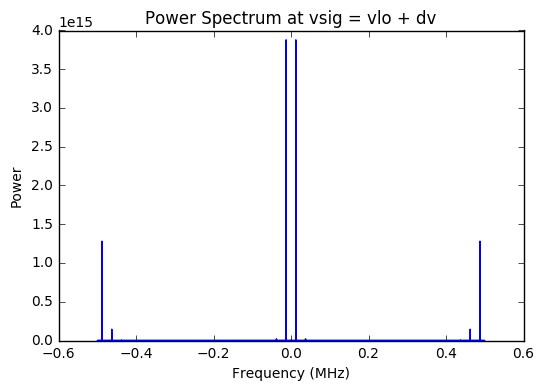

In [63]:
#power spectrum of vsig = vlo + dv
x = power_spectrum(plus)
plot_power(x[0], x[1], "vsig = vlo + dv")

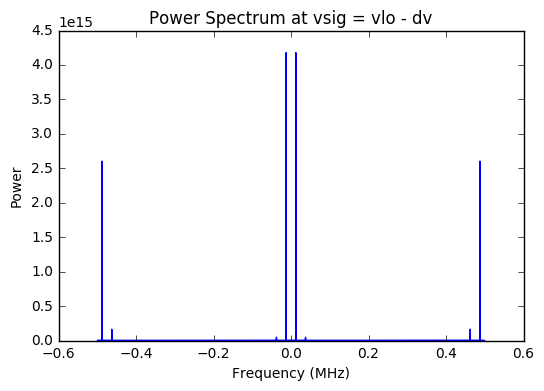

In [64]:
#power spectrum of vsig = vlo - dv
y = power_spectrum(minus)
plot_power(y[0], y[1], "vsig = vlo - dv")

## Plot waveform

In [65]:
# Total time for collection 
timetot = len(plus)/62.5e6
time = np.linspace(0, timetot, len(plus))
time

array([  0.00000000e+00,   1.60010001e-08,   3.20020001e-08, ...,
         2.55967998e-04,   2.55983999e-04,   2.56000000e-04])

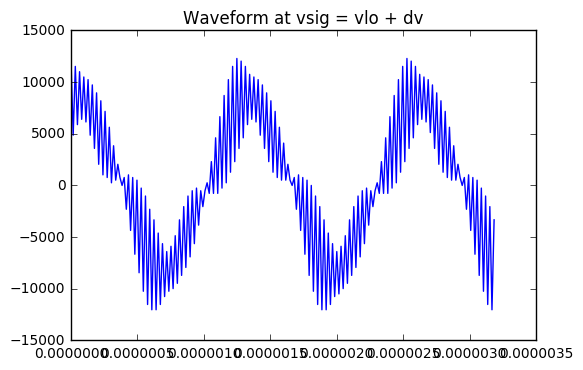

In [66]:
plt.plot(time[0:200], plus[:200])
plt.title('Waveform at vsig = vlo + dv')

## Voltage spectrum

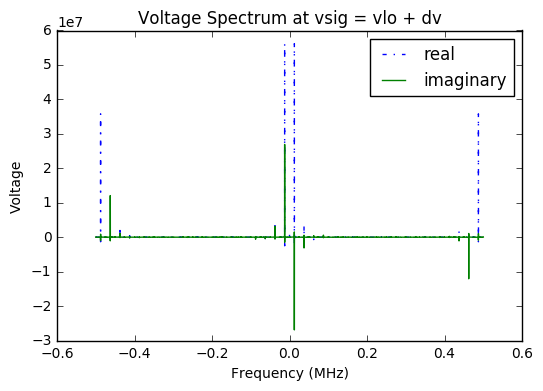

In [67]:
plus_voltage = voltage_spectrum(plus)
plot_voltage(plus_voltage[0], plus_voltage[1], plus_voltage[2], "vsig = vlo + dv")